## Homework:  Charts that Show Relationships  
#### DS2003, Due 7 October 2025
*15 points*

**Eleanor Fox**

### Set-up your environment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Create a Quadrant Chart
* A "quadrant chart" is basically a version of a scatter plot where the axes meet at the center of the chart.  The axes divide the chart into four quadrants.  We have seen some examples of what this looks like but search "quadrant chart" in google if you want to see more.
* You will create a quadrant chart using data from the 2024-2025 NFL (National Football League) regular season. 
* The key statistic to analyze is called EPA, which stands for "Expected Points Added."  This is measured both for offenses and for defenses.
* You will be examining teams by offensive EPA/play and defensive EPA/play (more about expected points added [here](https://www.nfeloapp.com/analysis/expected-points-added-epa-nfl/)). 
  * **You will need to find the data for the graph**. 
  * Offensive EPA/play should go on the y-axis and Defensive EPA/play should go on the x-axis.
* In addition to creating a graph that follows the principles we learned in class, **you should replace the standard marker with the team’s logo**. 
* Create your chart using a code notebook, document your steps, export your final copy to an html file, and submit on Canvas. 
* In your notebook, please list any sources with links you used to help you complete this assignment. 

Rubric:
You will be graded on the following:
* 5 points: student finds the data and creates a scatterplot with the correct axes.
* 10 points: student generally applies concepts learned in class to make the graph clear, visually appealing and informative.
* 15 points: student creates an exceptional graph that includes the team logos, clear code, and sources listed.  

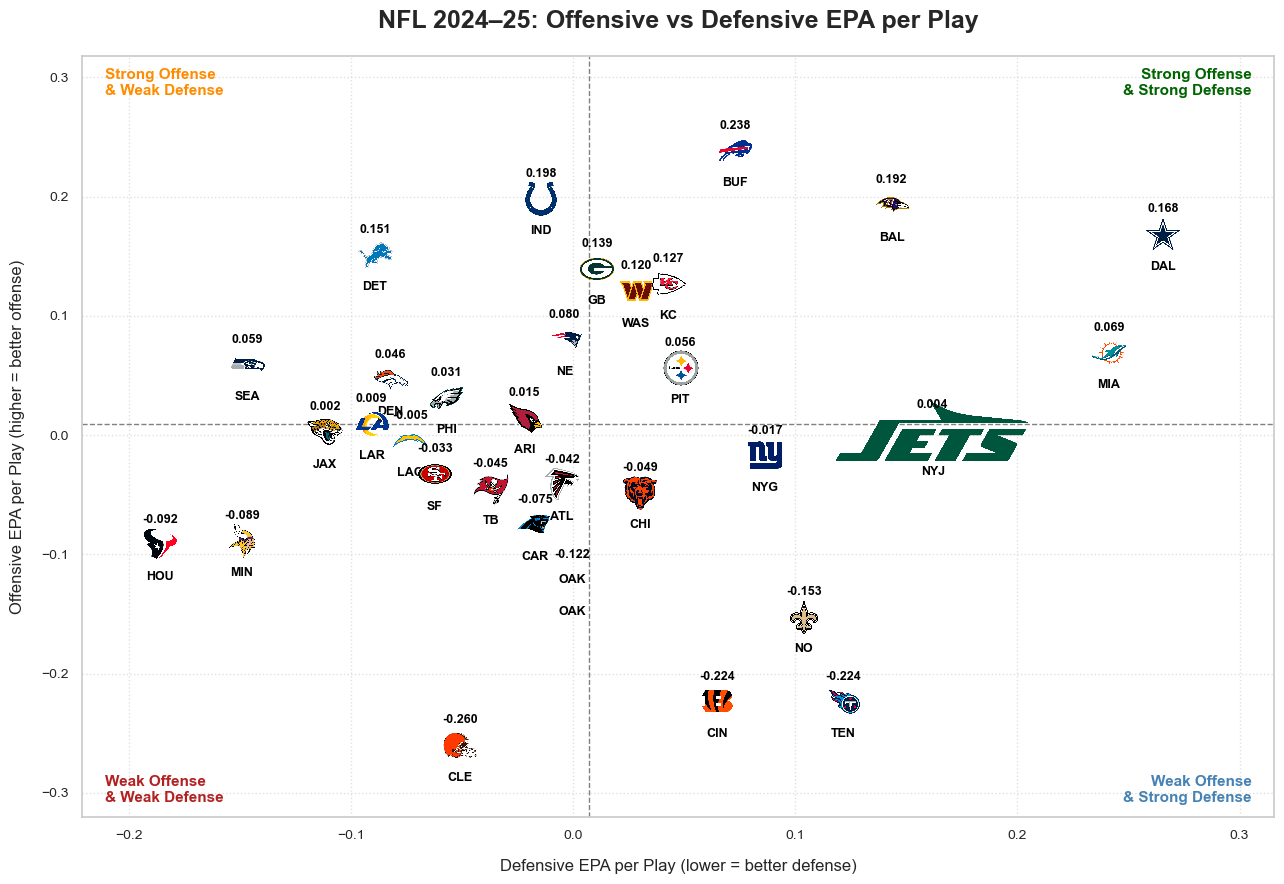


✅ Chart saved successfully at: C:\Users\elean\OneDrive - University of Virginia\Documents\DS 2003\HWOct7\nfl_epa_quadrant_chart_final_v7.png


<Figure size 640x480 with 0 Axes>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
import os

# --- Load data ---
file_path = r"C:\Users\elean\OneDrive - University of Virginia\Documents\DS 2003\HWOct7\EPA Tiers-export-2025-10-05.csv"
df = pd.read_csv(file_path)

# Rename columns
df = df.rename(columns={"EPA/Play": "Off_EPA", "EPA/Play Against": "Def_EPA"})

# --- Compute averages ---
x_avg = df["Def_EPA"].mean()
y_avg = df["Off_EPA"].mean()

# --- Figure setup ---
plt.figure(figsize=(13, 9))
sns.set_style("whitegrid")

# Axis scaling
x_min = df["Def_EPA"].min() - 0.05
x_max = df["Def_EPA"].max() + 0.05
y_min = df["Off_EPA"].min() - 0.06
y_max = df["Off_EPA"].max() + 0.08
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Quadrant lines
plt.axvline(x=x_avg, color="gray", linestyle="--", linewidth=1)
plt.axhline(y=y_avg, color="gray", linestyle="--", linewidth=1)

# Titles
plt.title("NFL 2024–25: Offensive vs Defensive EPA per Play", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Defensive EPA per Play (lower = better defense)", fontsize=12, labelpad=12)
plt.ylabel("Offensive EPA per Play (higher = better offense)", fontsize=12, labelpad=12)

# --- Add team logos and labels ---
logo_folder = r"C:\Users\elean\OneDrive - University of Virginia\Documents\DS 2003\HWOct7\logos"

def add_logo(team, x, y):
    """Add logo + EPA + team abbreviation, manually spaced to avoid overlap"""
    # Manual micro-adjustments for known overlaps
    if team == "KC":  x += 0.012;  y += 0.005
    if team == "WAS": x -= 0.012;  y -= 0.004
    if team == "GB":  y += 0.008
    if team == "LAR": x -= 0.006;  y += 0.003
    if team == "LAC": x += 0.006;  y -= 0.003
    if team == "SF":  y -= 0.006
    if team == "OAK": y -= 0.010
    if team == "HOU": x -= 0.015
    if team == "MIN": x += 0.015
    if team == "NYJ": y -= 0.004

    logo_path = os.path.join(logo_folder, f"{team}.png")
    if os.path.exists(logo_path):
        logo = plt.imread(logo_path)
        # Slightly smaller Jets
        if team == "NYJ":
            imagebox = OffsetImage(logo, zoom=0.037)
        else:
            imagebox = OffsetImage(logo, zoom=0.054)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False)
        plt.gca().add_artist(ab)
    else:
        plt.text(x, y, team, fontsize=9, ha="center", va="center", weight="bold", color="black")

    # EPA number slightly higher (3 decimals)
    plt.text(x, y + 0.016, f"{y:.3f}", fontsize=9, ha="center", va="bottom", color="black", fontweight="bold")

    # Team abbreviation slightly lower (Jets lower still)
    y_shift = 0.030 if team == "NYJ" else 0.022
    plt.text(x, y - y_shift, team, fontsize=9, ha="center", va="top", color="black", fontweight="bold")

# Plot all teams
for _, row in df.iterrows():
    add_logo(row["Team"], row["Def_EPA"], row["Off_EPA"])

# --- Quadrant labels (outside chart) ---
x_left, x_right = plt.xlim()
y_bottom, y_top = plt.ylim()

plt.text(x_left + 0.01, y_top - 0.01, "Strong Offense\n& Weak Defense",
         fontsize=11, color="darkorange", fontweight="bold", ha="left", va="top")
plt.text(x_right - 0.01, y_top - 0.01, "Strong Offense\n& Strong Defense",
         fontsize=11, color="darkgreen", fontweight="bold", ha="right", va="top")
plt.text(x_left + 0.01, y_bottom + 0.01, "Weak Offense\n& Weak Defense",
         fontsize=11, color="firebrick", fontweight="bold", ha="left", va="bottom")
plt.text(x_right - 0.01, y_bottom + 0.01, "Weak Offense\n& Strong Defense",
         fontsize=11, color="steelblue", fontweight="bold", ha="right", va="bottom")

# --- Final style ---
plt.grid(True, linestyle=":", alpha=0.6)
plt.tick_params(axis='both', labelsize=10)
plt.tight_layout()
plt.show()

# --- Save chart ---
save_path = r"C:\Users\elean\OneDrive - University of Virginia\Documents\DS 2003\HWOct7\nfl_epa_quadrant_chart_final_v7.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"\n✅ Chart saved successfully at: {save_path}")


**Data Sources:**

NFL 2024–2025 EPA Data: Imported from EPA Tiers-export-2025-10-05.csv

Expected Points Added (EPA): https://www.nfeloapp.com/analysis/expected-points-added-epa-nfl/

Team Logos: Downloaded from ESPN’s public logo database using the format:
https://a.espncdn.com/i/teamlogos/nfl/500/{TEAM_ABBREVIATION}.png

**Python Libraries**
- `pandas` — for reading and organizing data  
- `matplotlib.pyplot` — for plotting and adding team logos  
- `seaborn` — for chart styling and grid  
- `os` — for reading logo image files